### **1) Fetch one month of data of coronavirus from twitter before it's outbreak and after outbreak and compare peoples emotion.**
# -Use NLTK library for tokenization and for stopwords..

In [5]:
import nltk
import string
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
!pip install GetOldTweets3

In [8]:
import GetOldTweets3 as got
def get_tweets(keyword,start,end,mxm):
    tweet_criteria=got.manager.TweetCriteria().setQuerySearch(keyword).setSince(start).setUntil(end)\
    .setMaxTweets(mxm)
    tweets=got.manager.TweetManager.getTweets(tweet_criteria)
    text=[[tweet.text] for tweet in tweets]
    return text

In [9]:
#Considering WHO's outbreak date 30 Jan 2020. Getting 30 days before outbreak
before=get_tweets('corona virus', '2020-01-01','2020-02-01',500)
before

[['Me veré muy dramático si a partir del lunes uso mascarilla para ir a u? #coronavirus'],
 ['Unless Corona virus cancels the league #Dreamcatcher'],
 ['I told a few dumb liberals that the Corona virus was coming from Mexico. Now they want to build the wall.'],
 ['Many travel companies are limiting their operations to reduce the impact of the coronavirus outbreak on their financials while helping to safeguard public health. '],
 ['Les endroits publics à forte densité chinoise tel les bibliothèques comme à #Brossard devrait être interdit d’accès s’ils ont été en chine lors des derniers 15 voir 30 jours. #Coronavirus CC : #DoreenAssaad @Ad_Assaad'],
 ['Nose que es peor si el coronavirus o el Efecto Tusa que afecta a los pendejos de hoy en dia!!! '],
 ['CORONA-VIRUS, should be taken with a slice of LIME '],
 ['Corona virus. '],
 ['Coronavirus, ¿dónde se originó? ¿Tendrá algo que ver con salubridad, higiene, o falta de regulación del gobierno chino? Escucha del tema en reproducción del pro

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
text_before=''
for i in range(0,len(before)):
    text_before=text_before+'. '+before[i][0]
lower=text_before.lower()

cleaned_text=lower.translate(str.maketrans('','',string.punctuation))

from nltk.tokenize import word_tokenize
tokens=word_tokenize(cleaned_text,'english')

In [12]:
len(tokens)

9163

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stop_words=stopwords.words('english')
from nltk.corpus import stopwords
words=[word for word in tokens if word not in stop_words]

In [18]:
len(words)

7032

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [20]:
from nltk.stem import WordNetLemmatizer
lemma=[(WordNetLemmatizer().lemmatize(word)) for word in words]

In [21]:
len(lemma)

7032

In [25]:
clear_line=''
emotion_list=[]
with open('emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)
            
w=Counter(emotion_list)
print(w)

Counter({'sad': 4, 'angry': 3, 'attracted': 3, 'fearful': 3, 'powerless': 3, 'singledout': 3, 'average': 2, 'free': 1, 'alone': 1, 'lost': 1, 'attached': 1, 'surprise': 1, 'adequate': 1, 'happy': 1, 'loved': 1, 'anxious': 1})


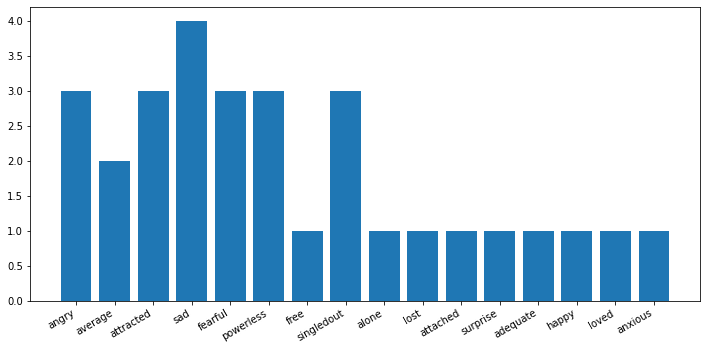

In [26]:
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_text)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'compound': -1.0, 'neg': 0.113, 'neu': 0.836, 'pos': 0.05}

In [29]:
# After the outbreak
after=get_tweets('corona virus','2020-03-25','2020-04-30',500)
#after

In [30]:
text_after=''
for i in range(0,len(after)):
    text_after=text_after+'. '+after[i][0]
lower_after=text_after.lower()

cleaned_after=lower_after.translate(str.maketrans('','',string.punctuation))

words_after=word_tokenize(cleaned_after,'english')

In [31]:
len(words_after)

11347

In [34]:
words_as=[word for word in words_after if word not in stop_words]
len(words_as)

8945

In [37]:
clear_line=''
emotion_list=[]
with open('emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)
            
w1=Counter(emotion_list)
print(w1)

Counter({'sad': 4, 'angry': 3, 'attracted': 3, 'fearful': 3, 'powerless': 3, 'singledout': 3, 'average': 2, 'free': 1, 'alone': 1, 'lost': 1, 'attached': 1, 'surprise': 1, 'adequate': 1, 'happy': 1, 'loved': 1, 'anxious': 1})


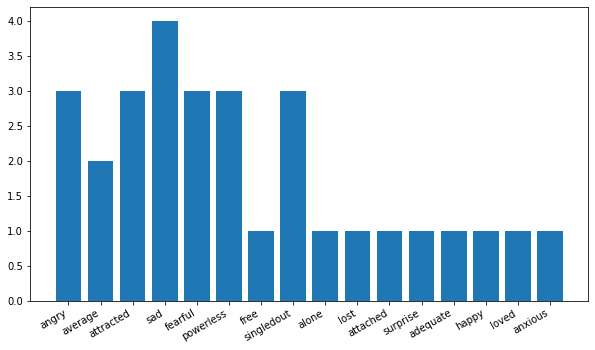

In [38]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(w1.keys(),w1.values())
fig.autofmt_xdate()
plt.show()

In [39]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_after)

{'compound': -0.9999, 'neg': 0.098, 'neu': 0.842, 'pos': 0.06}

# **2) Pick your choice of document and update the emotion document accordingly (you document words and associated emotion where applicable) and analyse the sentiments of people.**

In [40]:
text=''
with open('NLP1.txt','r') as file:
    for line in file:
        text=text+''+line

In [41]:
text=text.replace('\n',' ')

In [42]:
lower=text.lower()
cleaned=lower.translate(str.maketrans('?','.',string.punctuation))
tokens=word_tokenize(cleaned,'english')
print(len(tokens))

words=[word for word in tokens if word not in stop_words]
print(len(words))

lemma=[WordNetLemmatizer().lemmatize(word) for word in words]
print(len(lemma))

189
104
104


In [43]:
cleaned

'many of the chinese accounts that mushroomed on social media this summer and spread false information about the border clash with india have been traced to pakistan in what is believed to be a coordinated disinformation campaign aimed at india  the india china border tensions starting in may and culminating in the june 15 clash in the galwan valley sparked a firstofitskind information war on social media where indian and chinese accounts on twitter facebook and youtube traded images and videos in an effort to both capture the narrative and the attention of the media the disinformation flowed both ways but what was unknown to consumers of the posts by chinese social media users is that many of the accounts that posed as chinabased users were actually pakistani accounts twitter is banned in china although it can be accessed using virtual private networks an analysis of some of the most active chinese accounts on the border clash on twitter found that these accounts previously had differ

In [44]:
print(lemma)

['many', 'chinese', 'account', 'mushroomed', 'social', 'medium', 'summer', 'spread', 'false', 'information', 'border', 'clash', 'india', 'traced', 'pakistan', 'believed', 'coordinated', 'disinformation', 'campaign', 'aimed', 'india', 'india', 'china', 'border', 'tension', 'starting', 'may', 'culminating', 'june', '15', 'clash', 'galwan', 'valley', 'sparked', 'firstofitskind', 'information', 'war', 'social', 'medium', 'indian', 'chinese', 'account', 'twitter', 'facebook', 'youtube', 'traded', 'image', 'video', 'effort', 'capture', 'narrative', 'attention', 'medium', 'disinformation', 'flowed', 'way', 'unknown', 'consumer', 'post', 'chinese', 'social', 'medium', 'user', 'many', 'account', 'posed', 'chinabased', 'user', 'actually', 'pakistani', 'account', 'twitter', 'banned', 'china', 'although', 'accessed', 'using', 'virtual', 'private', 'network', 'analysis', 'active', 'chinese', 'account', 'border', 'clash', 'twitter', 'found', 'account', 'previously', 'different', 'profile', 'name', '

In [56]:
# Get emotions text
emotion_list = []
with open('emotions1.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({'social media': 3, ' false': 2, ' fight': 2, ' spread': 1, ' media': 1, 'fear': 1})


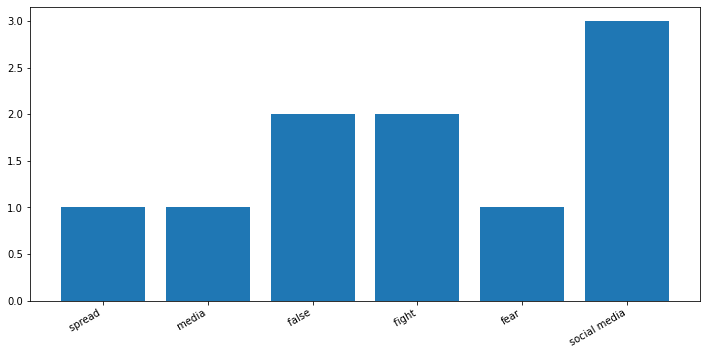

In [57]:
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()

In [58]:
sia.polarity_scores(cleaned)

{'compound': -0.5123, 'neg': 0.043, 'neu': 0.937, 'pos': 0.02}

### 3) Pick your own document (say A) and create BOW using a count vectorizer. Use another document (say B) and identify how many words of the B document are present in the BOW of A. 

In [69]:
s1= ['''Word vectorization is the process of mapping words to a set of real numbers or vectors. 
This is done to process the given words using machine learning techniques and extract relevant information from them 
such that it can be used in further predicting words. Vectorization is done by comparing a given word to the corpus
(collection) of the available words.''']

s2= ['''It is language modeling and feature learning technique. Word embedding is a way to perform mapping using a neural network.
There are various word embedding models available such as word2vec (Google), Glove (Stanford) and fastest (Facebook).
We are going to discuss about word2vec in this tutorial.Count vectorizer uses two of the following models as the base 
to vectorize the given words on the basis of frequency of words.''']

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
cvect=CountVectorizer(stop_words=stopwords.words('english'))
cvect.fit_transform(s1)
print(cvect.get_feature_names())

['available', 'collection', 'comparing', 'corpus', 'done', 'extract', 'given', 'information', 'learning', 'machine', 'mapping', 'numbers', 'predicting', 'process', 'real', 'relevant', 'set', 'techniques', 'used', 'using', 'vectorization', 'vectors', 'word', 'words']


In [72]:
cvect.vocabulary_

{'available': 0,
 'collection': 1,
 'comparing': 2,
 'corpus': 3,
 'done': 4,
 'extract': 5,
 'given': 6,
 'information': 7,
 'learning': 8,
 'machine': 9,
 'mapping': 10,
 'numbers': 11,
 'predicting': 12,
 'process': 13,
 'real': 14,
 'relevant': 15,
 'set': 16,
 'techniques': 17,
 'used': 18,
 'using': 19,
 'vectorization': 20,
 'vectors': 21,
 'word': 22,
 'words': 23}

In [73]:
cnew=cvect.transform(s2)
cnew=cnew.toarray()

In [74]:
import pandas as pd

In [75]:
rep=pd.DataFrame(cnew,columns=cvect.get_feature_names())
rep

,available,collection,comparing,corpus,done,extract,given,information,learning,machine,mapping,numbers,predicting,process,real,relevant,set,techniques,used,using,vectorization,vectors,word,words
0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,2,2


In [76]:
cnew.sum() #total repetitive words(including that are repeated twice)

9

In [77]:
cols=rep.columns
dic={}
for col in cols:
    if rep[col].sum()>=1:
        dic[col]=rep[col].sum()
print(dic)

{'available': 1, 'given': 1, 'learning': 1, 'mapping': 1, 'using': 1, 'word': 2, 'words': 2}


In [78]:
len(dic.keys()) #total repetitive words 

7